In [82]:
import copy
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [83]:
def gen_array(size = 100):
    A = []
    for _ in range(size):
        A.append(random.randint(0, size))
    return A

In [84]:
def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        
        # Insert A[j] into the sorted sequence A[...j-1]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = key
        
    return A

In [73]:
# p<=q<=r and A[p...q], A[q+1...r] is sorted order
def merge(A, p, q, r):
    n1 = q - p + 1 # len left array
    n2 = r - q     # len right array
    
    L = [] # left array
    R = [] # right array
    
    # make left array
    for i in range(n1):
        L.append(A[p + i])
        
        
    # make right array
    for j in range(n2):
        R.append(A[q + j + 1])
        
    L.append(float('inf'))
    R.append(float('inf'))
    
    i = 0
    j = 0
    
    for k in range(p, r+1):
        # compare left array with right array
        if L[i] <= R[j]:
            A[k] = L[i]
            i = i + 1
        else:
            A[k] = R[j]
            j = j + 1
            
    return A

def merge_sort(A, p, r):
    if p < r:
        q = (p + r)//2
        merge_sort(A, p, q)
        merge_sort(A, q+1, r)
        merge(A, p, q, r)

In [99]:
count = 4
sizes = np.logspace(start=1, stop=count, num=count, base=10)
insertion_times = []
merge_times = []

for s in sizes:
    arr = gen_array(int(s))
    start = time.time()
    insertion_sort(copy.copy(arr))
    end = time.time()
    insertion_times.append(end - start)
    
    start = time.time()
    merge_sort(copy.copy(arr), 0, len(arr) -1)
    end = time.time()
    merge_times.append(end - start)
    

df = pd.DataFrame({
    'insertion_sort' : insertion_times,
    'merge_sort' : merge_times
}
)
df

,insertion_sort,merge_sort
0,0.000012,0.000036
1,0.000345,0.000633
2,0.052445,0.008577
3,4.595253,0.061913


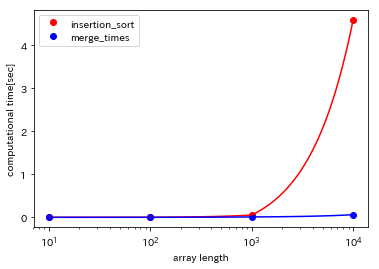

In [100]:
# Spline https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
sp_insert = interp1d(sizes, insertion_times)
sp_merge = interp1d(sizes, merge_times)
sp_x = np.linspace(sizes[0], sizes[-1], num=100)

insertion_label,  = plt.plot(sizes, insertion_times, 'ro', label='insertion_sort')
merge_label,  = plt.plot(sizes, merge_times, 'bo', label='merge_times')
plt.plot(sp_x, sp_insert(sp_x), 'r-',
         sp_x, sp_merge(sp_x), 'b-')

plt.legend(handles=[insertion_label, merge_label])
plt.xscale('log')
plt.xlabel('array length')
plt.ylabel('computational time[sec]')
plt.show()

In [101]:
count = 100
sizes = np.linspace(100, 10 * count, num= count)
insertion_times = []
merge_times = []

for s in sizes:
    arr = gen_array(int(s))
    start = time.time()
    insertion_sort(copy.copy(arr))
    end = time.time()
    insertion_times.append(end - start)
    
    start = time.time()
    merge_sort(copy.copy(arr), 0, len(arr) -1)
    end = time.time()
    merge_times.append(end - start)
    

df = pd.DataFrame({
    'insertion_sort' : insertion_times,
    'merge_sort' : merge_times
}
)
df

,insertion_sort,merge_sort
0,0.000536,0.000575
1,0.000504,0.000592
2,0.000619,0.000558
3,0.000968,0.000663
4,0.000747,0.000814
5,0.000831,0.000655
6,0.000735,0.000539
7,0.001176,0.000642
8,0.001829,0.001181
9,0.001513,0.000660


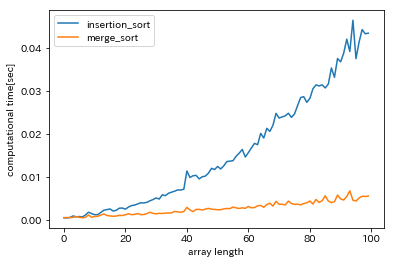

In [102]:
df.plot(kind='line')

plt.xlabel('array length')
plt.ylabel('computational time[sec]')
plt.legend(loc='best')
plt.show()